# Predicting Sports Winners with Decision Trees

Here, we will look at predicting the winner of sports matches using a different type of classification algorithm: decision trees. These algorithms have a number of advantages over other algorithms. One of the main advantages is that they are readable by humans. In this way, decision trees can be used to learn a procedure,
which could then be given to a human to perform if needed. Another advantage is that they work with a variety of features.

## Loading the dataset

We'll be looking at predicting the winner of games of the **National Basketball Association (NBA)**. Matches in the NBA are often close and can be decided in the last minute, making predicting the winner quite difficult. Many sports share this characteristic, whereby the expected winner could be beaten by another team on the right day.

Various research into predicting the winner suggests that there may be an upper limit to sports outcome prediction accuracy which, depending on the sport, is between 70 percent and 80 percent accuracy. There is a significant amount of research being performed into sports prediction, often through data mining or statistics-based methods.

## Collecting the data

The data we will be using is the match history data for the NBA for the 2013-2014 season. The website http://Basketball-Reference.com contains a significant number of resources and statistics collected from the NBA and other leagues. To download the dataset, perform the following steps:

1. Navigate to http://www.basketball-reference.com/leagues/NBA_2014_games.html in your web browser.
2. Choose to get table as csv file for each month
3. copy and paste the csv to your data folder and make a note of the path.

This will download a **CSV** (short for **Comma Separated Values**) file containing the
results of the 1,230 games in the regular season for the NBA.

CSV files are simply text files where each line contains a new row and each value is separated by a comma (hence the name). CSV files can be created manually by simply typing into a text editor and saving with a *.csv* extension. They can also be opened in any program that can read text files, but can also be opened in Excel as a spreadsheet.

We will load the file with the **pandas** (short for **Python Data Analysis**) library, which is an incredibly useful library for manipulating data. Python also contains a,built-in library called *csv* that supports reading and writing CSV files. However, we will use pandas, which provides more powerful functions that we will use later in the chapter for creating new features.

In [20]:
DATA = 'data/'
NBA_2014_SEASON = DATA + 'leagues_NBA_2014_games_games.csv'
NBA_EXTENDED_STANDINGS = DATA + 'leagues_NBA_2013_standings_expanded_standings.csv'

In [2]:
import numpy as np
import pandas as pd

# This is the entire season! Make sure to filter regular season
# October 29, 2013 to April 16, 2014
results = pd.read_csv(NBA_2014_SEASON)
results.head()

,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Unnamed: 6,Unnamed: 7,Attend.,LOG,Arena,Notes
0,Tue Oct 29 2013,7:00p,Orlando Magic,87,Indiana Pacers,97,Box Score,NaN,18165,2:17,Bankers Life Fieldhouse,NaN
1,Tue Oct 29 2013,10:30p,Los Angeles Clippers,103,Los Angeles Lakers,116,Box Score,NaN,18997,2:27,STAPLES Center,NaN
2,Tue Oct 29 2013,8:00p,Chicago Bulls,95,Miami Heat,107,Box Score,NaN,19964,2:32,AmericanAirlines Arena,NaN
3,Wed Oct 30 2013,7:00p,Brooklyn Nets,94,Cleveland Cavaliers,98,Box Score,NaN,20562,2:23,Quicken Loans Arena,NaN
4,Wed Oct 30 2013,8:30p,Atlanta Hawks,109,Dallas Mavericks,118,Box Score,NaN,19834,2:14,American Airlines Center,NaN


## Cleaning up the dataset

After looking at the output, we can see a number of problems:
- The date is just a string and not a date object
- From visually inspecting the results, the headings aren't complete or correct

These issues come from the data, and we could fix this by altering the data itself. However, in doing this, we could forget the steps we took or misapply them; that is, we can't replicate our results. As with the previous section where we used pipelines to track the transformations we made to a dataset, we will use pandas to apply
transformations to the raw data itself.

In [3]:

# Parse the date column as a date
results = pd.read_csv(NBA_2014_SEASON, parse_dates=["Date"])
# Fix the name of the columns
results.columns = ['Date', 'Start (ET)', 'Visitor Team', 'VisitorPts', 'Home Team', 'HomePts', 'Score Type', 'OT?', 'Attend.', 'LOG', 'Arena', 'Notes']
results.head()

,Date,Start (ET),Visitor Team,VisitorPts,Home Team,HomePts,Score Type,OT?,Attend.,LOG,Arena,Notes
0,2013-10-29,7:00p,Orlando Magic,87,Indiana Pacers,97,Box Score,NaN,18165,2:17,Bankers Life Fieldhouse,NaN
1,2013-10-29,10:30p,Los Angeles Clippers,103,Los Angeles Lakers,116,Box Score,NaN,18997,2:27,STAPLES Center,NaN
2,2013-10-29,8:00p,Chicago Bulls,95,Miami Heat,107,Box Score,NaN,19964,2:32,AmericanAirlines Arena,NaN
3,2013-10-30,7:00p,Brooklyn Nets,94,Cleveland Cavaliers,98,Box Score,NaN,20562,2:23,Quicken Loans Arena,NaN
4,2013-10-30,8:30p,Atlanta Hawks,109,Dallas Mavericks,118,Box Score,NaN,19834,2:14,American Airlines Center,NaN


In [4]:
results.shape

(1319, 12)

In [5]:
results = results[results['Date'] <= '2014-04-16']
results.shape

(1230, 12)

Now that we have our dataset, we can compute a **baseline**. A baseline is an accuracy that indicates an easy way to get a good accuracy. Any data mining solution should beat this.

In each match, we have two teams: a home team and a visitor team. An obvious baseline, called the chance rate, is 50 percent. Choosing randomly will (over time) result in an accuracy of 50 percent.

## Extracting new features

We can now extract our features from this dataset by combining and comparing the existing data. First up, we need to specify our class value, which will give our classification algorithm something to compare against to see if its prediction is correct or not. This could be encoded in a number of ways; however, for this application, we will specify our class as 1 if the home team wins and 0 if the visitor team wins.

In [6]:

results["HomeWin"] = results["VisitorPts"] < results["HomePts"]

# Our "class values"
y_true = results["HomeWin"].values
results.head()

,Date,Start (ET),Visitor Team,VisitorPts,Home Team,HomePts,Score Type,OT?,Attend.,LOG,Arena,Notes,HomeWin
0,2013-10-29,7:00p,Orlando Magic,87,Indiana Pacers,97,Box Score,NaN,18165,2:17,Bankers Life Fieldhouse,NaN,True
1,2013-10-29,10:30p,Los Angeles Clippers,103,Los Angeles Lakers,116,Box Score,NaN,18997,2:27,STAPLES Center,NaN,True
2,2013-10-29,8:00p,Chicago Bulls,95,Miami Heat,107,Box Score,NaN,19964,2:32,AmericanAirlines Arena,NaN,True
3,2013-10-30,7:00p,Brooklyn Nets,94,Cleveland Cavaliers,98,Box Score,NaN,20562,2:23,Quicken Loans Arena,NaN,True
4,2013-10-30,8:30p,Atlanta Hawks,109,Dallas Mavericks,118,Box Score,NaN,19834,2:14,American Airlines Center,NaN,True


In [7]:
home_win_percentage = 100 * results["HomeWin"].sum() / results["HomeWin"].count()
print(f"Home Win percentage: {home_win_percentage:.1f}%")

Home Win percentage: 58.0%


In [8]:
results["HomeLastWin"] = False
results["VisitorLastWin"] = False
# This creates two new columns, all set to False
results.head()

,Date,Start (ET),Visitor Team,VisitorPts,Home Team,HomePts,Score Type,OT?,Attend.,LOG,Arena,Notes,HomeWin,HomeLastWin,VisitorLastWin
0,2013-10-29,7:00p,Orlando Magic,87,Indiana Pacers,97,Box Score,NaN,18165,2:17,Bankers Life Fieldhouse,NaN,True,False,False
1,2013-10-29,10:30p,Los Angeles Clippers,103,Los Angeles Lakers,116,Box Score,NaN,18997,2:27,STAPLES Center,NaN,True,False,False
2,2013-10-29,8:00p,Chicago Bulls,95,Miami Heat,107,Box Score,NaN,19964,2:32,AmericanAirlines Arena,NaN,True,False,False
3,2013-10-30,7:00p,Brooklyn Nets,94,Cleveland Cavaliers,98,Box Score,NaN,20562,2:23,Quicken Loans Arena,NaN,True,False,False
4,2013-10-30,8:30p,Atlanta Hawks,109,Dallas Mavericks,118,Box Score,NaN,19834,2:14,American Airlines Center,NaN,True,False,False


The key of this dictionary will be the team and the value will be whether they won their previous game. We can then iterate over all the rows and update the current row with the team's last result.

In [9]:
# Now compute the actual values for these
# Did the home and visitor teams win their last game?
from collections import defaultdict


won_last = defaultdict(int)
for index, row in results.iterrows():  # Note that this is not efficient
    home_team = row["Home Team"]
    visitor_team = row["Visitor Team"]
    row["HomeLastWin"] = won_last[home_team]
    row["VisitorLastWin"] = won_last[visitor_team]
    results.iloc[index] = row    
    # Set current win
    won_last[home_team] = row["HomeWin"]
    won_last[visitor_team] = not row["HomeWin"]
results.iloc[20:25]

,Date,Start (ET),Visitor Team,VisitorPts,Home Team,HomePts,Score Type,OT?,Attend.,LOG,Arena,Notes,HomeWin,HomeLastWin,VisitorLastWin
20,2013-11-01,7:00p,New Orleans Pelicans,90,Orlando Magic,110,Box Score,NaN,18846,2:13,Amway Center,NaN,True,False,False
21,2013-11-01,7:00p,Philadelphia 76ers,109,Washington Wizards,102,Box Score,NaN,17160,2:06,Verizon Center,NaN,False,False,True
22,2013-11-01,7:30p,Toronto Raptors,95,Atlanta Hawks,102,Box Score,NaN,18118,2:12,Philips Arena,NaN,True,False,True
23,2013-11-01,7:30p,Milwaukee Bucks,105,Boston Celtics,98,Box Score,NaN,18624,2:23,TD Garden,NaN,False,False,False
24,2013-11-01,8:00p,Miami Heat,100,Brooklyn Nets,101,Box Score,NaN,17732,2:54,Barclays Center,NaN,True,False,False


## Decision trees

Decision trees are a class of supervised learning algorithm like a flow chart that consists of a sequence of nodes, where the values for a sample are used to make a decision on the next node to go to.

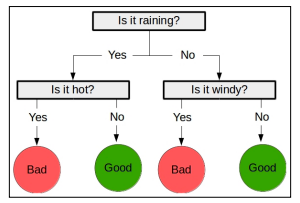

As with most classification algorithms, there are two components:

- The first is the training stage, where a tree is built using training data. While the nearest neighbor algorithm from the previous chapter did not have a training phase, it is needed for decision trees. In this way, the nearest neighbor algorithm is a *lazy learner*, only doing any work when it needs to make a prediction. In contrast, decision trees, like most classification methods, are *eager learners*, undertaking work at the training stage.

• The second is the predicting stage, where the trained tree is used to predict the classification of new samples. Using the previous example tree, a data point of ["is raining", "very windy"] would be classed
as "bad weather".

The `scikit-learn` package implements the **CART** (**Classification and Regression Trees**) algorithm as its default decision tree class, which can use both categorical and continuous features.

## Parameters in decision trees

One of the most important features for a decision tree is the stopping criterion. Using such specific nodes
can results in trees that significantly overfit the training data. Instead, a stopping criterion can be used to ensure that the decision tree does not reach this exactness.

Instead of using a stopping criterion, the tree could be created in full and then trimmed. This trimming process removes nodes that do not provide much information to the overall process. This is known as pruning.

The decision tree implementation in scikit-learn provides a method to stop the
building of a tree using the following options:

- `min_samples_split`: This specifies how many samples are needed in order to create a new node in the decision tree
- `min_samples_leaf`: This specifies how many samples must be resulting from a node for it to stay

Another parameter for decision tress is the criterion for creating a decision. Gini impurity and Information gain are two popular ones:

- **Gini impurity**: This is a measure of how often a decision node would incorrectly predict a sample's class
- **Information gain**: This uses information-theory-based entropy to indicate how much extra information is gained by the decision node

## Using decision trees

We can import the DecisionTreeClassifier class and create a decision tree using scikit-learn:

In [10]:

from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=14)

In [11]:
from sklearn.model_selection import cross_val_score

# Create a dataset with just the neccessary information
X_previouswins = results[["HomeLastWin", "VisitorLastWin"]].values
clf = DecisionTreeClassifier(random_state=14)
scores = cross_val_score(clf, X_previouswins, y_true, scoring='accuracy')
print("Using just the last result from the home and visitor teams")
print(f"Accuracy: {np.mean(scores) * 100:.1f}%")

Using just the last result from the home and visitor teams
Accuracy: 58.0%


This scores 58 percent: we are better than choosing randomly! We should be able to do better. Feature engineering is one of the most difficult tasks in data mining, and choosing good features is key to getting good outcomes—more so than choosing the right algorithm!

In [13]:
# What about win streaks?
results["HomeWinStreak"] = 0
results["VisitorWinStreak"] = 0
# Did the home and visitor teams win their last game?
from collections import defaultdict
win_streak = defaultdict(int)

for index, row in results.iterrows():  # Note that this is not efficient
    home_team = row["Home Team"]
    visitor_team = row["Visitor Team"]
    row["HomeWinStreak"] = win_streak[home_team]
    row["VisitorWinStreak"] = win_streak[visitor_team]
    results.iloc[index] = row    
    # Set current win
    if row["HomeWin"]:
        win_streak[home_team] += 1
        win_streak[visitor_team] = 0
    else:
        win_streak[home_team] = 0
        win_streak[visitor_team] += 1


In [14]:
clf = DecisionTreeClassifier(random_state=14)
X_winstreak =  results[["HomeLastWin", "VisitorLastWin", "HomeWinStreak", "VisitorWinStreak"]].values
scores = cross_val_score(clf, X_winstreak, y_true, scoring='accuracy')
print("Using whether the home team is ranked higher")
print(f"Accuracy: {np.mean(scores) * 100:.1f}%")

Using whether the home team is ranked higher
Accuracy: 58.3%


## Glossary

Also view explanations by holding mouse over column headers
- Rk -- Rank
- Overall -- Overall W-L record
- Place
- Home -- W-L record in home games
- Road -- W-L record in road games
- Conference
- E -- W-L record versus Eastern Conference teams
- W -- W-L record versus Western Conference teams
- Division
- A -- W-L record versus Atlantic Division teams
- C -- W-L record versus Central Division teams
- SE -- W-L record versus Southeast Division teams
- NW -- W-L record versus Northwest Division teams
- P -- W-L record versus Pacific Division teams
- SW -- W-L record versus Southwest Division teams
- All-Star
- Pre -- W-L records before the All-Star Game
- Post -- W-L records after the All-Star Game
- Margin
- ≤3 -- W-L record in games decided by 3 or fewer points
- ≥10 -- W-L record in games decided by 10 or more points
- Month
- Oct -- W-L record in the month of October
- Nov -- W-L record in the month of November
- Dec -- W-L record in the month of December
- Jan -- W-L record in the month of January
- Feb -- W-L record in the month of February
- Mar -- W-L record in the month of March
- Apr -- W-L record in the month of April
- Rk -- Rank
- Overall -- Overall W-L record
- Place
- Home -- W-L record in home games
- Road -- W-L record in road games
- Conference
- E -- W-L record versus Eastern Conference teams
- W -- W-L record versus Western Conference teams
- Division
- A -- W-L record versus Atlantic Division teams
- C -- W-L record versus Central Division teams
- SE -- W-L record versus Southeast Division teams
- NW -- W-L record versus Northwest Division teams
- P -- W-L record versus Pacific Division teams
- SW -- W-L record versus Southwest Division teams
- All-Star
- Pre -- W-L records before the All-Star Game
- Post -- W-L records after the All-Star Game
- Margin
- ≤3 -- W-L record in games decided by 3 or fewer points
- ≥10 -- W-L record in games decided by 10 or more points
- Month
- Oct -- W-L record in the month of October
- Nov -- W-L record in the month of November
- Dec -- W-L record in the month of December
- Jan -- W-L record in the month of January
- Feb -- W-L record in the month of February
- Mar -- W-L record in the month of March
- Apr -- W-L record in the month of April

In [23]:
# Let's try see which team is better on the ladder. Using the previous year's ladder
ladder = pd.read_csv(NBA_EXTENDED_STANDINGS, skiprows=[0])
ladder

,Rk,Team,Overall,Home,Road,E,W,A,C,SE,...,Post,≤3,≥10,Oct,Nov,Dec,Jan,Feb,Mar,Apr
0,1,San Antonio Spurs,62-20,32-9,30-11,24-6,38-14,8-2,7-3,9-1,...,24-5,7-0,35-12,1-0,13-3,11-4,8-6,9-3,16-0,4-4
1,2,Oklahoma City Thunder,59-23,34-7,25-16,23-7,36-16,8-2,8-2,7-3,...,16-11,10-4,33-8,1-0,10-3,14-3,13-4,6-5,10-4,5-4
2,3,Los Angeles Clippers,57-25,34-7,23-18,21-9,36-16,9-1,7-3,5-5,...,20-7,4-3,30-9,1-1,11-4,9-7,12-4,7-4,13-2,4-3
3,4,Indiana Pacers,56-26,35-6,21-20,38-14,18-12,15-3,12-4,11-7,...,16-14,4-3,29-17,2-0,13-1,10-4,10-5,9-3,8-10,4-3
4,5,Houston Rockets,54-28,33-8,21-20,23-7,31-21,7-3,8-2,8-2,...,18-11,7-6,30-9,1-0,12-5,8-8,10-4,8-2,10-4,5-5
5,6,Miami Heat,54-28,32-9,22-19,34-18,20-10,9-9,13-5,12-4,...,17-14,8-7,29-10,1-1,12-2,11-4,8-6,9-1,10-8,3-6
6,7,Portland Trail Blazers,54-28,31-10,23-18,23-7,31-21,9-1,9-1,5-5,...,18-11,8-9,24-13,0-1,13-2,12-4,8-6,7-5,8-9,6-1
7,8,Golden State Warriors,51-31,27-14,24-17,20-10,31-21,7-3,7-3,6-4,...,20-9,11-8,28-9,1-1,8-7,11-5,9-6,7-4,9-5,6-3
8,9,Memphis Grizzlies,50-32,27-14,23-18,21-9,29-23,6-4,7-3,8-2,...,21-9,10-4,18-13,0-1,8-7,5-9,12-3,7-5,12-5,6-2
9,10,Dallas Mavericks,49-33,26-15,23-18,20-10,29-23,5-5,9-1,6-4,...,17-11,11-11,23-10,1-0,9-8,8-5,9-8,9-3,8-6,5-3


In [25]:

# We can create a new feature -- HomeTeamRanksHigher\
results["HomeTeamRanksHigher"] = 0
for index, row in results.iterrows():
    home_team = row["Home Team"]
    visitor_team = row["Visitor Team"]
    # if home_team == "New Orleans Pelicans":
    #     home_team = "New Orleans Hornets"
    # elif visitor_team == "New Orleans Pelicans":
    #     visitor_team = "New Orleans Hornets"
    home_rank = ladder[ladder["Team"] == home_team]["Rk"].values[0]
    visitor_rank = ladder[ladder["Team"] == visitor_team]["Rk"].values[0]
    row["HomeTeamRanksHigher"] = int(home_rank > visitor_rank)
    results.iloc[index] = row
results.head()

,Date,Start (ET),Visitor Team,VisitorPts,Home Team,HomePts,Score Type,OT?,Attend.,LOG,Arena,Notes,HomeWin,HomeLastWin,VisitorLastWin,HomeWinStreak,VisitorWinStreak,HomeTeamRanksHigher
0,2013-10-29,7:00p,Orlando Magic,87,Indiana Pacers,97,Box Score,NaN,18165,2:17,Bankers Life Fieldhouse,NaN,True,0,0,0,0,0
1,2013-10-29,10:30p,Los Angeles Clippers,103,Los Angeles Lakers,116,Box Score,NaN,18997,2:27,STAPLES Center,NaN,True,0,0,0,0,1
2,2013-10-29,8:00p,Chicago Bulls,95,Miami Heat,107,Box Score,NaN,19964,2:32,AmericanAirlines Arena,NaN,True,0,0,0,0,0
3,2013-10-30,7:00p,Brooklyn Nets,94,Cleveland Cavaliers,98,Box Score,NaN,20562,2:23,Quicken Loans Arena,NaN,True,0,0,0,0,1
4,2013-10-30,8:30p,Atlanta Hawks,109,Dallas Mavericks,118,Box Score,NaN,19834,2:14,American Airlines Center,NaN,True,0,0,0,0,0


In [26]:
X_homehigher =  results[["HomeLastWin", "VisitorLastWin", "HomeTeamRanksHigher"]].values

clf = DecisionTreeClassifier(random_state=14)
scores = cross_val_score(clf, X_homehigher, y_true, scoring='accuracy')

print("Using whether the home team is ranked higher")
print(f"Accuracy: {np.mean(scores) * 100:.1f}%")

Using whether the home team is ranked higher
Accuracy: 67.6%


In [ ]:
from sklearn.model_selection import GridSearchCV

parameter_space = {
                   "max_depth": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
                   }
clf = DecisionTreeClassifier(random_state=14)
grid = GridSearchCV(clf, parameter_space)
grid.fit(X_homehigher, y_true)
print(f"Accuracy: {grid.best_score_ * 100:.1f}%")

In [ ]:
# Who won the last match? We ignore home/visitor for this bit
last_match_winner = defaultdict(int)
results["HomeTeamWonLast"] = 0

for index, row in results.iterrows():
    home_team = row["Home Team"]
    visitor_team = row["Visitor Team"]
    teams = tuple(sorted([home_team, visitor_team]))  # Sort for a consistent ordering
    # Set in the row, who won the last encounter
    row["HomeTeamWonLast"] = 1 if last_match_winner[teams] == row["Home Team"] else 0
    results.ix[index] = row
    # Who won this one?
    winner = row["Home Team"] if row["HomeWin"] else row["Visitor Team"]
    last_match_winner[teams] = winner
results.head()

In [ ]:
X_home_higher =  results[["HomeTeamRanksHigher", "HomeTeamWonLast"]].values
clf = DecisionTreeClassifier(random_state=14)
scores = cross_val_score(clf, X_home_higher, y_true, scoring='accuracy')
print("Using whether the home team is ranked higher")
print(f"Accuracy: {np.mean(scores) * 100:.1f}%")

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
encoding = LabelEncoder()
encoding.fit(results["Home Team"].values)
home_teams = encoding.transform(results["Home Team"].values)
visitor_teams = encoding.transform(results["Visitor Team"].values)
X_teams = np.vstack([home_teams, visitor_teams]).T

onehot = OneHotEncoder()
X_teams = onehot.fit_transform(X_teams).todense()

clf = DecisionTreeClassifier(random_state=14)
scores = cross_val_score(clf, X_teams, y_true, scoring='accuracy')
print(f"Accuracy: {np.mean(scores) * 100:.1f}%")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=14)
scores = cross_val_score(clf, X_teams, y_true, scoring='accuracy')
print("Using full team labels is ranked higher")
print(f"Accuracy: {np.mean(scores) * 100:.1f}%")

In [ ]:

X_all = np.hstack([X_home_higher, X_teams])
print(X_all.shape)

In [ ]:
clf = RandomForestClassifier(random_state=14)
scores = cross_val_score(clf, X_all, y_true, scoring='accuracy')
print("Using whether the home team is ranked higher")
print(f"Accuracy: {np.mean(scores) * 100:.1f}%")

In [ ]:
#n_estimators=10, criterion='gini', max_depth=None, 
#min_samples_split=2, min_samples_leaf=1,
#max_features='auto',
#max_leaf_nodes=None, bootstrap=True,
#oob_score=False, n_jobs=1,
#random_state=None, verbose=0, min_density=None, compute_importances=None
parameter_space = {
                   "max_features": [2, 10, 'auto'],
                   "n_estimators": [100,],
                   "criterion": ["gini", "entropy"],
                   "min_samples_leaf": [2, 4, 6],
                   }
clf = RandomForestClassifier(random_state=14)
grid = GridSearchCV(clf, parameter_space)
grid.fit(X_all, y_true)
print(f"Accuracy: {grid.best_score_ * 100:.1f}%")
print(grid.best_estimator_)